<h1>Purse Seine Logistic Regression Model</h1>

<h2>Import Modules</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
import pylab as pl

<h2>Data Pre-Processing</h2>

In [2]:
#Load all the data into numpy arrays
ps_data = np.load('../datasets/measures/kristina_ps.measures.npz')

#Move _data['x'][:] into _x[:]
ps_data = ps_data['x']

#Convert into Pandas data frame
ps_data = pd.DataFrame(ps_data)

In [3]:
#drop unknown fishing points
ps_data['classification'].astype(int)
ps_data = ps_data[ps_data['classification'] != -1]

#drop duplicate rows
ps_data.drop_duplicates()

,measure_coursestddev_1800_log,measure_courseavg_43200,course,measure_sin_course,measure_daylightavg_900,measure_speedstddev_10800,speed,measure_pos_86400,measure_daylightavg_43200,measure_latavg_86400,...,measure_speedavg_21600,measure_count_900,measure_speedstddev_86400_log,measure_lonavg_10800,measure_speedstddev_10800_log,lat,measure_speedstddev_43200_log,measure_pos_21600,measure_speedstddev_900_log,measure_speedstddev_1800_log
8953,-2.999746,0.463714,165.300003,0.179434,0.0,1.463216e-02,13.8,1.070728,0.0,15.665814,...,0.160000,2.0,-1.852031,141.893448,-1.805981,14.187220,-1.844596,0.355266,-2.999875,-2.999885
9065,-2.999681,0.505093,130.100006,0.540881,1.0,3.794118e-01,13.5,1.078425,0.0,9.691691,...,0.356109,2.0,-0.830036,143.410736,-0.419746,8.323613,-0.700849,0.055672,-2.999865,-2.999874
9067,-1.963659,0.495833,128.500000,0.553388,1.0,3.605178e-01,13.7,1.089220,0.0,9.656761,...,0.344538,4.0,-0.835067,143.433772,-0.441870,8.294512,-0.708479,0.080266,-2.162263,-2.162263
9089,-2.317412,0.519268,187.199997,-0.088624,0.0,3.720323e-03,14.4,1.244046,0.0,7.527528,...,0.152941,2.0,-0.759939,143.262112,-2.326028,5.319983,-1.919471,0.504051,-2.999895,-2.999946
9117,-2.999842,0.561921,343.100006,-0.205557,1.0,6.810662e-07,4.3,0.599564,0.0,5.457550,...,0.402941,2.0,-0.537750,142.957047,-2.999704,4.813727,-0.524164,0.156513,-2.999694,-2.999702
9183,-3.000000,0.505417,243.899994,-0.635001,0.0,2.176471e-01,7.8,0.170771,0.0,4.626957,...,0.889412,2.0,-0.514617,143.082443,-0.660256,4.491555,-0.635386,0.042048,-2.999744,-2.999752
9185,-2.108592,0.518889,245.000000,-0.640856,0.0,2.109644e-01,8.2,0.169567,0.0,4.620979,...,0.827451,4.0,-0.518049,143.064774,-0.673737,4.489468,-0.618035,0.050204,-1.893990,-1.893990
9187,-2.183775,0.530337,244.500000,-0.638224,0.0,1.929275e-01,7.9,0.168255,0.0,4.615487,...,0.785714,6.0,-0.522519,143.055779,-0.712361,4.489173,-0.610847,0.053047,-1.958684,-1.958684
9189,-2.999658,0.567821,104.300003,0.685198,0.0,1.776614e-01,1.0,0.169295,0.0,4.601949,...,0.747059,2.0,-0.520567,143.033306,-0.747969,4.480467,-0.727243,0.049738,-2.999652,-2.999661
9217,-2.999746,0.691894,14.400000,0.175850,0.0,8.823530e-03,0.1,0.258258,0.0,4.259965,...,0.811111,2.0,-0.589560,142.830879,-2.007732,4.052080,-0.599383,0.017239,-2.999642,-2.999649


In [4]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('classification ~ measure_courseavg_10800 + measure_courseavg_1800 + measure_courseavg_21600 + measure_courseavg_3600 + measure_courseavg_43200 + measure_courseavg_86400 + measure_coursestddev_10800 + measure_coursestddev_1800 + measure_coursestddev_21600 + measure_coursestddev_3600 + measure_coursestddev_43200 + measure_coursestddev_86400 + measure_pos_10800 + measure_pos_1800 + measure_pos_21600 + measure_pos_3600 + measure_pos_43200 + measure_pos_86400 + measure_speedavg_10800 + measure_speedavg_1800 + measure_speedavg_21600 + measure_speedavg_3600 + measure_speedavg_43200 + measure_speedavg_86400 + measure_speedstddev_10800 + measure_speedstddev_1800 + measure_speedstddev_21600 + measure_speedstddev_3600 + measure_speedstddev_43200 + measure_speedstddev_86400', ps_data, return_type="dataframe")
print X.columns
y = np.ravel(y)

Index([u'Intercept', u'measure_courseavg_10800', u'measure_courseavg_1800',
       u'measure_courseavg_21600', u'measure_courseavg_3600',
       u'measure_courseavg_43200', u'measure_courseavg_86400',
       u'measure_coursestddev_10800', u'measure_coursestddev_1800',
       u'measure_coursestddev_21600', u'measure_coursestddev_3600',
       u'measure_coursestddev_43200', u'measure_coursestddev_86400',
       u'measure_pos_10800', u'measure_pos_1800', u'measure_pos_21600',
       u'measure_pos_3600', u'measure_pos_43200', u'measure_pos_86400',
       u'measure_speedavg_10800', u'measure_speedavg_1800',
       u'measure_speedavg_21600', u'measure_speedavg_3600',
       u'measure_speedavg_43200', u'measure_speedavg_86400',
       u'measure_speedstddev_10800', u'measure_speedstddev_1800',
       u'measure_speedstddev_21600', u'measure_speedstddev_3600',
       u'measure_speedstddev_43200', u'measure_speedstddev_86400'],
      dtype='object')


In [5]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
ps_model = LogisticRegression(class_weight='balanced')
ps_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(ps_model.coef_)))

,0,1
0,Intercept,[1.52920900439]
1,measure_courseavg_10800,[2.91808240418]
2,measure_courseavg_1800,[0.647206755472]
3,measure_courseavg_21600,[-0.516238678091]
4,measure_courseavg_3600,[-2.86605017966]
5,measure_courseavg_43200,[0.741876180077]
6,measure_courseavg_86400,[0.172226803733]
7,measure_coursestddev_10800,[-2.04435534195]
8,measure_coursestddev_1800,[-3.65673675547]
9,measure_coursestddev_21600,[1.64843703349]


In [7]:
# calculate null accuracy in a single line of code
max(y_test.mean(), 1 - y_test.mean())

0.97354413283546515

In [8]:
# predict class labels for the test set
predicted = ps_model.predict(X_test)
print predicted
print predicted.mean()

[ 1.  0.  0. ...,  0.  0.  0.]
0.210057996345


In [9]:
# generate class probabilities
probs = ps_model.predict_proba(X_test)
print probs

[[ 0.34723288  0.65276712]
 [ 0.92142981  0.07857019]
 [ 0.91712813  0.08287187]
 ..., 
 [ 0.97682732  0.02317268]
 [ 0.93278678  0.06721322]
 [ 0.86306992  0.13693008]]


/Users/jonathangessert/.virtualenvs/illegal-fishing2.7/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [10]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.8065464368
0.893658306585


('Sensitivity:', 0.81381381381381379)
('Specificity:', 0.80643055328872204)
None


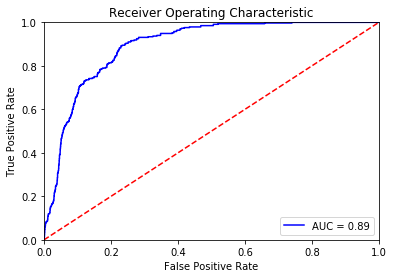

In [11]:
# calculate the fpr and tpr for all thresholds of the classification
probs = ps_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

print evaluate_threshold(0.5)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area Under Curve: 0.16


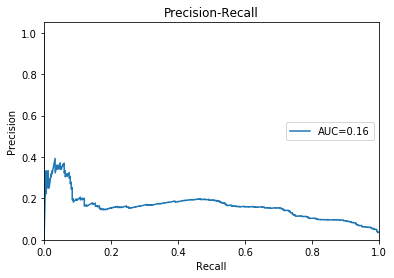

In [12]:
# Compute Precision-Recall and plot curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds)
area = metrics.auc(recall, precision)
print "Area Under Curve: %0.2f" % area

pl.clf()
pl.plot(recall, precision, label='AUC=%0.2f' % area)
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall' )
pl.legend(loc="center right")
pl.show()

In [13]:
# define a function that accepts a threshold and prints sensitivity and specificity
#def evaluate_threshold(threshold):
#    print('Sensitivity:', tpr[thresholds > threshold][-1])
#    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

#for t in range(0,100):
#    print 0.005*t
#    evaluate_threshold(0.005*t)

In [14]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[9881 2373]
 [  62  271]]
             precision    recall  f1-score   support

        0.0       0.99      0.81      0.89     12254
        1.0       0.10      0.81      0.18       333

avg / total       0.97      0.81      0.87     12587



In [15]:
# evaluate the model using 10-fold cross-validation
scores = model_selection.cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.96877979  0.9721163   0.9721163   0.97020972  0.9721163   0.96329838
  0.97139452  0.97234803  0.97186457  0.96995708]
0.970420099758


In [16]:
#cross_val_score(LogisticRegression(), X, y, cv=10, scoring='roc_auc').mean()